## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import files
from google.colab import drive
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

from scipy import stats
from scipy.stats import normaltest

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

Прочитаем наш файл с исходными данными:

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/train_pp.csv'
taxi_data = pd.read_csv(path)

In [ ]:
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [ ]:
taxi_data['pickup_datetime']=pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
taxi_data.sample(10)

id  vendor_id     pickup_datetime     dropoff_datetime  \
778207   id1690159          2 2016-03-31 21:17:59  2016-03-31 21:29:36   
753467   id3777127          2 2016-03-14 08:18:32  2016-03-14 08:38:29   
1373618  id2732544          2 2016-03-03 00:27:53  2016-03-03 00:58:30   
1385623  id1311918          2 2016-06-21 17:32:58  2016-06-21 17:58:23   
448015   id3331370          1 2016-02-26 23:20:24  2016-02-26 23:28:01   
244371   id2089711          1 2016-05-04 22:11:05  2016-05-04 22:29:11   
1356848  id1324190          1 2016-02-16 10:37:10  2016-02-16 10:43:19   
852335   id3406186          1 2016-04-25 14:08:32  2016-04-25 14:30:08   
646081   id0645541          1 2016-05-19 21:09:14  2016-05-19 21:09:22   
945744   id1104952          1 2016-05-15 00:20:04  2016-05-15 00:41:54   

         passenger_count  pickup_longitude  pickup_latitude  \
778207                 1        -73.976219        40.744122   
753467                 1        -73.985794        40.722954   
1373618                1        -73.983788        40.726929   
1385623                1        -73.981003        40.738022   
448015                 1        -73.954323        40.710770   
244371                 1        -73.782303        40.644421   
1356848                1        -73.978111        40.745892   
852335                 1        -73.970390        40.799210   
646081                 2        -73.981911        40.777260   
945744                 1        -73.987038        40.701492   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
778207          -73.998940         40.728081                  N            697  
753467          -73.977570         40.752163                  N           1197  
1373618         -73.922791         40.687962                  N           1837  
1385623         -73.979851         40.743469                  N           1525  
448015          -73.985748         40.717876                  N            457  
244371          -73.846687         40.724289                  N           1086  
1356848         -73.968384         40.750942                  N            369  
852335          -73.975197         40.760883                  N           1296  
646081          -73.981895         40.777447                  N              8  
945744          -73.903168         40.745850                  N           1310

### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [ ]:
taxi_data.isnull().sum ()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [ ]:
unique_count = taxi_data['vendor_id'].nunique()
print('Количество уникальных таксопарков: ', unique_count)

Количество уникальных таксопарков:  2


In [ ]:
max_pass = taxi_data['passenger_count'].max()
print('Максимальное количество пассажиров:', max_pass)

Максимальное количество пассажиров: 9


In [ ]:
mean_1 = int(taxi_data['trip_duration'].astype(float).mean())
print('Средняя длительность поездки (в секундах): ', mean_1)

Средняя длительность поездки (в секундах):  959


In [ ]:
median_1 = int(taxi_data['trip_duration'].astype(float).median())
print('Медианная длительность поездки (в секундах): ', median_1)

Медианная длительность поездки (в секундах):  662


In [ ]:
min_1 = int(taxi_data['trip_duration'].astype(float).min())
print('Минимальное время поездки (в секундах): ', min_1)

Минимальное время поездки (в секундах):  1


In [ ]:
max_1 = int(taxi_data['trip_duration'].astype(float).max())
print('Максимальное время поездки (в секундах): ', max_1)

Максимальное время поездки (в секундах):  3526282


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [ ]:
def add_datetime_features(data):
    data['pickup_date'] = data['pickup_datetime'].dt.date
    data['pickup_hour'] = data['pickup_datetime'].dt.hour
    data['pickup_day_of_week'] = data['pickup_datetime'].dt.weekday

    return data

In [ ]:
taxi_data = add_datetime_features(taxi_data)
taxi_data.sample(5)

id  vendor_id     pickup_datetime     dropoff_datetime  \
391284   id2011482          2 2016-05-04 07:20:42  2016-05-04 07:42:14   
1102276  id2392954          1 2016-04-11 23:41:42  2016-04-11 23:56:54   
1103306  id3713884          2 2016-06-06 15:18:53  2016-06-06 15:22:21   
472736   id3451212          2 2016-02-02 18:07:54  2016-02-02 18:26:30   
1409196  id2466462          2 2016-04-08 21:43:05  2016-04-08 21:57:59   

         passenger_count  pickup_longitude  pickup_latitude  \
391284                 1        -73.962448        40.755131   
1102276                1        -73.984245        40.769939   
1103306                1        -73.979431        40.739891   
472736                 1        -73.982040        40.768570   
1409196                1        -74.005440        40.740688   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
391284          -73.966057         40.793159                  N   
1102276         -73.989441         40.726166                  N   
1103306         -73.981880         40.731079                  N   
472736          -73.989029         40.760307                  N   
1409196         -73.986343         40.728008                  N   

         trip_duration pickup_date  pickup_hour  pickup_day_of_week  
391284            1292  2016-05-04            7                   2  
1102276            912  2016-04-11           23                   0  
1103306            208  2016-06-06           15                   0  
472736            1116  2016-02-02           18                   1  
1409196            894  2016-04-08           21                   4

In [ ]:
a = len(taxi_data[taxi_data['pickup_day_of_week'] == 5])
print('Количество поездок в субботу:', a)

Количество поездок в субботу: 220868


In [ ]:
b = round(len(taxi_data) / len(taxi_data['pickup_date'].unique()))
print('Среднее количество поездок в день:', b)

Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
uploaded = files.upload()

Saving holiday_data.csv to holiday_data.csv


In [ ]:
holiday_data = pd.read_csv('/content/holiday_data.csv',  sep=';')

In [ ]:
def add_holiday_features(df_taxi, df_holiday):
    df_holiday['date'] = pd.to_datetime(df_holiday['date'], format='%Y-%m-%d %H:%M:%S').dt.date
    df_taxi['pickup_holiday'] = df_taxi['pickup_date'].isin(df_holiday['date']).astype('int')

    return df_taxi

In [ ]:
taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1458639         -73.994911         40.740170                  N   
1458640         -73.970184         40.796547                  N   
1458641         -74.004433         40.707371                  N   
1458642         -73.974632         40.757107                  N   
1458643         -73.972809         40.790585                  N   

         trip_duration pickup_date  pickup_hour  pickup_day_of_week  \
0                  455  2016-03-14           17                   0   
1                  663  2016-06-12            0                   6   
2                 2124  2016-01-19           11                   1   
3                  429  2016-04-06           19                   2   
4                  435  2016-03-26           13                   5   
...                ...         ...          ...                 ...   
1458639            778  2016-04-08           13                   4   
1458640            655  2016-01-10            7                   6   
1458641            764  2016-04-22            6                   4   
1458642            373  2016-01-05           15                   1   
1458643            198  2016-04-05           14                   1   

         pickup_holiday  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1458639               0  
1458640               0  
1458641               0  
1458642               0  
1458643               0  

[1458644 rows x 15 columns]

In [ ]:
print(taxi_data['pickup_holiday'].unique())

[0 1]


In [ ]:
median_2 = taxi_data[taxi_data.pickup_holiday == 1]['trip_duration'].median()
print('Медиана длительностити поездок в праздники =', median_2)

Медиана длительностити поездок в праздники = 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/osrm_data_train.csv'
osrm_data = pd.read_csv(path)

In [ ]:
osrm_data

id               starting_street              end_street  \
0        id2875421               Columbus Circle        East 65th Street   
1        id2377394                    2nd Avenue  Washington Square West   
2        id3504673              Greenwich Street                Broadway   
3        id2181028                      Broadway        West 81st Street   
4        id0801584              Lexington Avenue        West 31st Street   
...            ...                           ...                     ...   
1458638  id2976426                   Cargo Plaza        East 51st Street   
1458639  id1440046  Former Terminal 6 Departures              3rd Avenue   
1458640  id1607338                   Cargo Plaza         West 8th Street   
1458641  id2071901                   Cargo Plaza   Laurel Hill Boulevard   
1458642  id0995846         Terminal 8 departures       West 106th Street   

         total_distance  total_travel_time  number_of_steps  \
0                2009.1              164.9                5   
1                2513.2              332.0                6   
2                1779.4              235.8                4   
3                1614.9              140.1                5   
4                1393.5              189.4                5   
...                 ...                ...              ...   
1458638         28051.1             1462.5               13   
1458639         29616.3             1643.2               16   
1458640         25615.0             1765.1               30   
1458641         20284.1             1074.3               14   
1458642         30302.5             1675.8               20   

                                      street_for_each_step  \
0        Columbus Circle|Central Park West|65th Street ...   
1        2nd Avenue|East 13th Street|5th Avenue|Washing...   
2            Greenwich Street|Park Place|Broadway|Broadway   
3        Broadway|West 86th Street|Columbus Avenue|West...   
4        Lexington Avenue|East 27th Street|Madison Aven...   
...                                                    ...   
1458638  Cargo Plaza|Cargo Plaza|Van Wyck Expressway|Ca...   
1458639  Former Terminal 6 Departures|Cargo Plaza|Cargo...   
1458640  Cargo Plaza|Cargo Plaza|Cargo Plaza|Cargo Plaz...   
1458641  Cargo Plaza|Cargo Plaza|Cargo Plaza|Van Wyck E...   
1458642  Terminal 8 departures|Cargo Plaza|Cargo Plaza|...   

                                         distance_per_step  \
0                                    0|576.4|885.6|547.1|0   
1                          877.3|836.5|496.1|164.2|139.1|0   
2                                      644.2|379.9|755.3|0   
3                                  617|427.4|412.2|158.3|0   
4                                 18.9|311.9|313.3|749.4|0   
...                                                    ...   
1458638  145.4|1039|12154.4|931.8|6422.3|3745.6|2032.5|...   
1458639  110.2|415.2|895.1|12154.4|931.8|6422.3|1686.5|...   
1458640  179.5|66.3|314.8|431.8|1557.5|266.3|454.7|604|...   
1458641  124.3|535.2|895.1|12154.4|931.8|1521.6|573.1|3...   
1458642  493.4|436.6|238.9|8759.3|703.1|3806.4|5006.7|1...   

                                      travel_time_per_step  \
0                                       0|61.1|60.1|43.7|0   
1                               111.7|109|69.9|25.8|15.6|0   
2                                        80.5|50.8|104.5|0   
3                                        56|36|37.8|10.3|0   
4                                     6.3|42.9|48.4|91.8|0   
...                                                    ...   
1458638  21|82.8|489.4|57.2|359.5|164.1|139.9|14.4|2.9|...   
1458639  15.9|63.9|71.6|489.4|57.2|359.5|81.8|19.4|10.3...   
1458640  28|9.5|25.2|34.5|62|21.3|36.6|24.1|25.2|238.2|...   
1458641  22|79|71.6|489.4|57.2|85.4|45.9|28.5|22.2|9.5|...   
1458642  73|64.8|19|350|56.3|152.4|200.6|115.1|81.1|179...   

                                            step_maneuvers  \
0                       depart|rotary|turn|new na

In [ ]:
def add_osrm_features(taxi_data, osrm_data):
    osrm = osrm_data[['id', 'total_distance',
                      'total_travel_time', 'number_of_steps']]
    taxi_data = pd.merge(taxi_data, osrm, on='id', how='left')
    return taxi_data

taxi_data = add_osrm_features(taxi_data, osrm_data)

In [ ]:
c = taxi_data.trip_duration.median() - taxi_data.total_travel_time.median()
print(c)

372.5


In [ ]:
omissions = taxi_data.isnull().sum()
print(omissions)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64


In [ ]:
taxi_data.shape[0] - taxi_data.dropna().shape[0]

1

In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [ ]:
def add_geographical_features(taxi_data):
    taxi_data['haversine_distance'] = get_haversine_distance(
        lat1=taxi_data['pickup_latitude'],
        lng1=taxi_data['pickup_longitude'],
        lat2=taxi_data['dropoff_latitude'],
        lng2=taxi_data['dropoff_longitude'])
    taxi_data['direction'] = get_angle_direction(
        lat1=taxi_data['pickup_latitude'],
        lng1=taxi_data['pickup_longitude'],
        lat2=taxi_data['dropoff_latitude'],
        lng2=taxi_data['dropoff_longitude'])
    return taxi_data

taxi_data = add_geographical_features(taxi_data)

In [ ]:
print('Медианное расстояние Хаверсина поездок (в киллометрах)', round(taxi_data.haversine_distance.median(),2))

Медианное расстояние Хаверсина поездок (в киллометрах) 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [ ]:
def add_cluster_features(taxi_data, kmeans):
    taxi_data['geo_cluster'] = kmeans.predict(
        taxi_data[['pickup_latitude', 'pickup_longitude',
                   'dropoff_latitude', 'dropoff_longitude']])
    return taxi_data

taxi_data = add_cluster_features(taxi_data, kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [ ]:
print(taxi_data.groupby('geo_cluster')['id'].count().min())

2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [ ]:
uploaded = files.upload()

Saving weather_data.csv to weather_data.csv


In [ ]:
weather_data = pd.read_csv('/content/weather_data.csv')

In [ ]:
def add_weather_features(taxi_data, weather_data):
    weather_data['time'] = pd.to_datetime(weather_data['time'],
                                          format='%Y-%m-%d %H:%M:%S')

    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour
    weather_data = weather_data[['temperature', 'visibility', 'wind speed',
                                 'precip', 'events', 'date', 'hour']]

    taxi_data = taxi_data.merge(weather_data,
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'], how='left')

    taxi_data = taxi_data.drop(['date', 'hour'], axis=1)

    return taxi_data

taxi_data = add_weather_features(taxi_data, weather_data)

In [ ]:
print('Количество поездок в снежную погоду:', taxi_data[taxi_data.events == 'Snow'].shape[0])

Количество поездок в снежную погоду: 13126


In [ ]:
taxi_data[['temperature','visibility','wind speed', 'precip', 'events']].isna().sum()

temperature    12032
visibility     12032
wind speed     12032
precip         12032
events         12032
dtype: int64

In [ ]:
taxi_data['precip'].isna().sum() / taxi_data.shape[0] *100

0.8248757064780714

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [ ]:
def fill_null_weather_data(df_taxi):
    col = ['temperature', 'visibility', 'wind speed', 'precip']
    df_taxi[col] = df_taxi[col].fillna(df_taxi.groupby('pickup_date')[col].transform('median'))
    df_taxi['events'] = df_taxi['events'].fillna('None')
    df_taxi['total_distance'] = df_taxi['total_distance'].fillna(df_taxi['total_distance'].median(skipna=True))
    df_taxi['total_travel_time'] = df_taxi['total_travel_time'].fillna(df_taxi['total_travel_time'].median(skipna=True))
    df_taxi['number_of_steps'] = df_taxi['number_of_steps'].fillna(df_taxi['number_of_steps'].median(skipna=True))
    return df_taxi

In [ ]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.head()

id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  total_travel_time  \
0         40.765602                  N  ...              164.9   
1         40.731152                  N  ...              332.0   
2         40.710087                  N  ...              767.6   
3         40.706718                  N  ...              235.8   
4         40.782520                  N  ...              140.1   

  number_of_steps  haversine_distance   direction  geo_cluster  temperature  \
0             5.0            1.498521   99.970196            9          4.4   
1             6.0            1.805507 -117.153768            4         28.9   
2            16.0            6.385098 -159.680165            4         -6.7   
3             4.0            1.485498 -172.737700            4          7.2   
4             5.0            1.188588  179.473585            9          9.4   

   visibility  wind speed  precip  events  
0         8.0        27.8     0.3    None  
1        16.1         7.4     0.0    None  
2        16.1        24.1     0.0    None  
3        16.1        25.9     0.0    None  
4        16.1         9.3     0.0    None  

[5 rows x 26 columns]

In [ ]:
temp_1 = taxi_data['temperature'].median()
temp_1

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


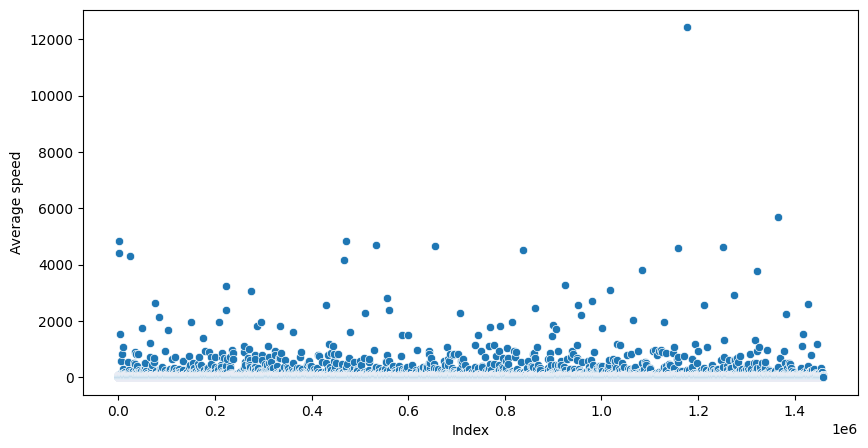

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [ ]:
tr_dur = taxi_data[(taxi_data['trip_duration'] > 86400)]
print(f'Выбросы по длительности поездки более 24 часа: {tr_dur.shape[0]}')

Выбросы по длительности поездки более 24 часа: 4


In [ ]:
speed = taxi_data[((taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) >=300)]
print(f'Выбросы по скорости поездки: {speed.shape[0]}')

Выбросы по скорости поездки: 407


In [ ]:
taxi_data = taxi_data.drop(tr_dur.index, axis=0)
taxi_data = taxi_data.drop(speed.index, axis=0)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

<ipython-input-50-32d8e31c6a96>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(taxi_data['trip_duration_log'])


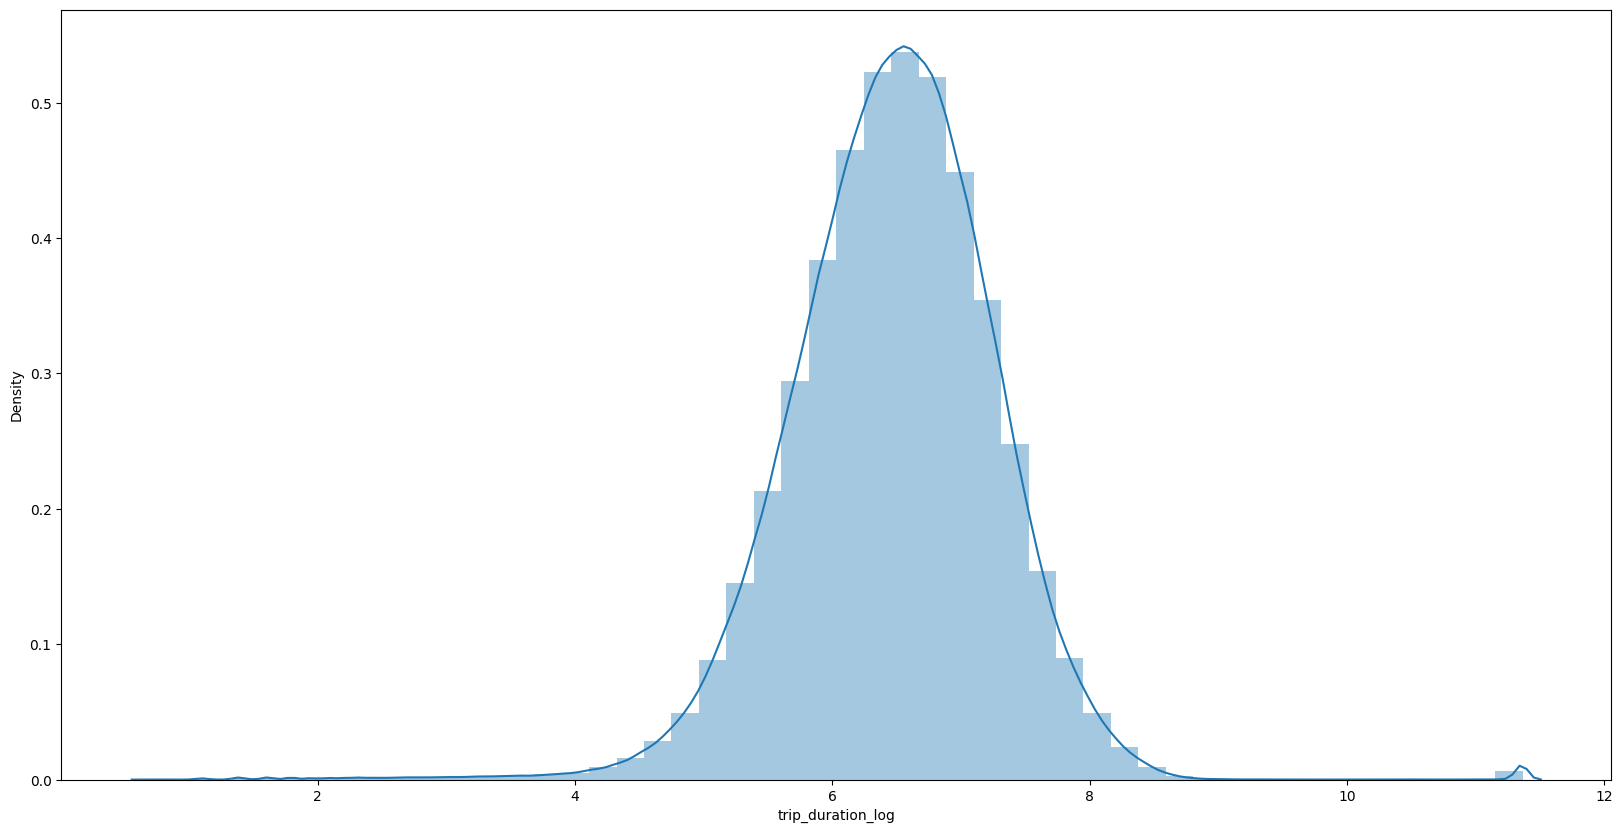

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns_plot = sns.distplot(taxi_data['trip_duration_log'])
fig = sns_plot.get_figure()

In [ ]:
stat, p = stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05
print('p-value = ', p)
if p < alpha:  # проверка условия
    print("Распределение отлично от нормального")
else:
    print("Распределение нормальное")

p-value =  0.0
Распределение отлично от нормального


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

In [ ]:
taxi_data['vendor_id'].value_counts()

2    780118
1    678115
Name: vendor_id, dtype: int64

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

Text(0.5, 1.0, '2-ой таксопарк')

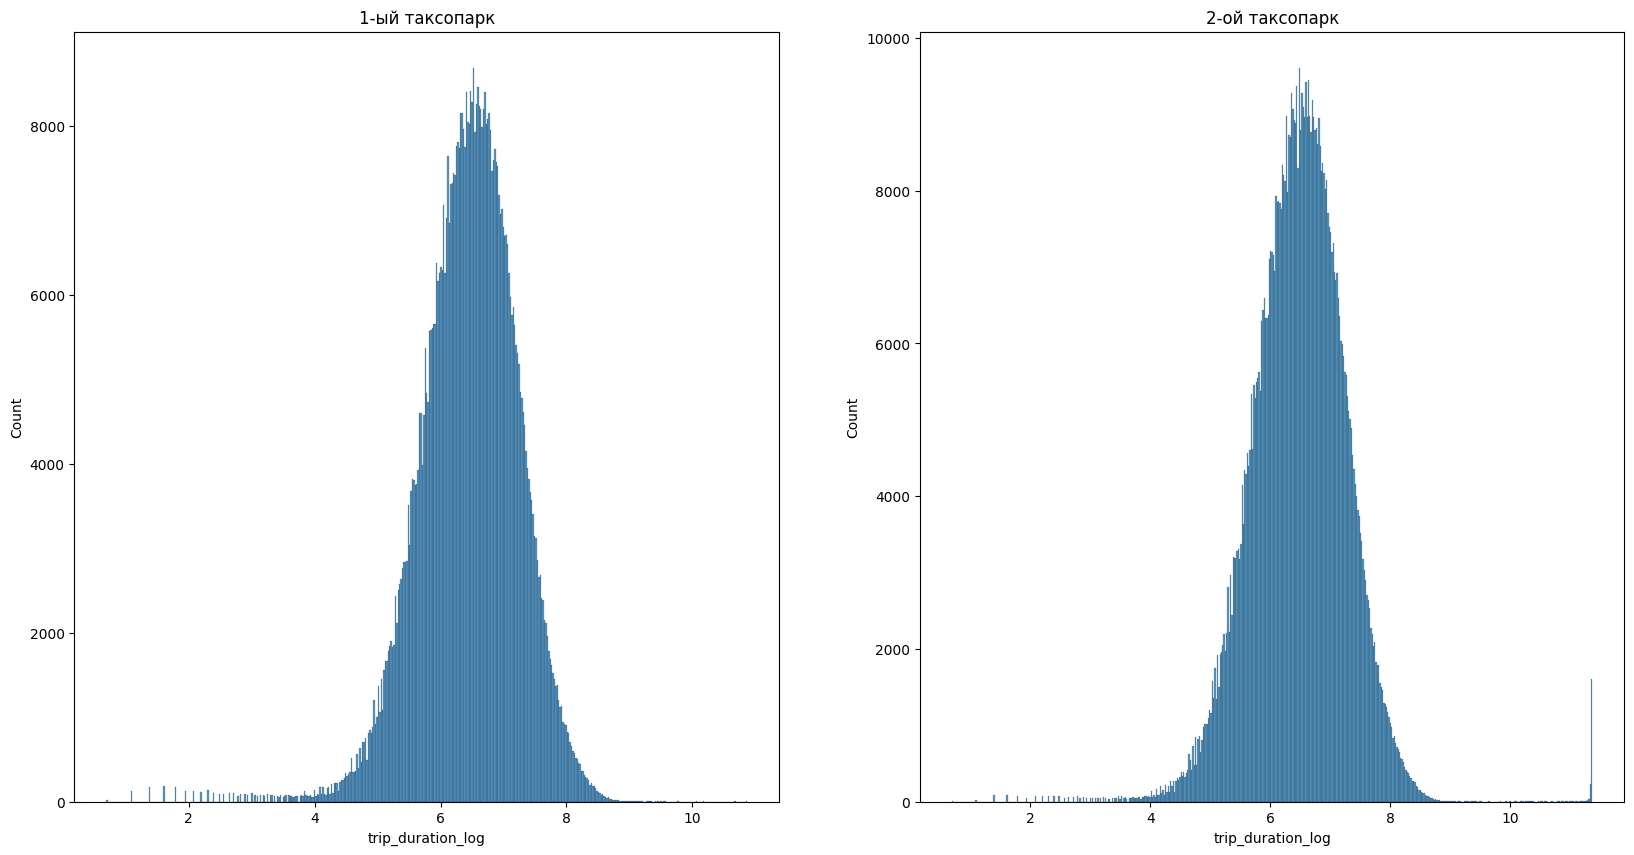

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
histplot  = sns.histplot(data = taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log'], ax=axes[0])
histplot.set_title('1-ый таксопарк')
histplot  = sns.histplot(data = taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log'], ax=axes[1])
histplot.set_title('2-ой таксопарк')

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

In [ ]:
data_a = taxi_data.groupby(by='pickup_hour', as_index=False)['trip_duration'].count()
data_b = taxi_data.groupby(by='pickup_hour', as_index=False)['trip_duration'].median()

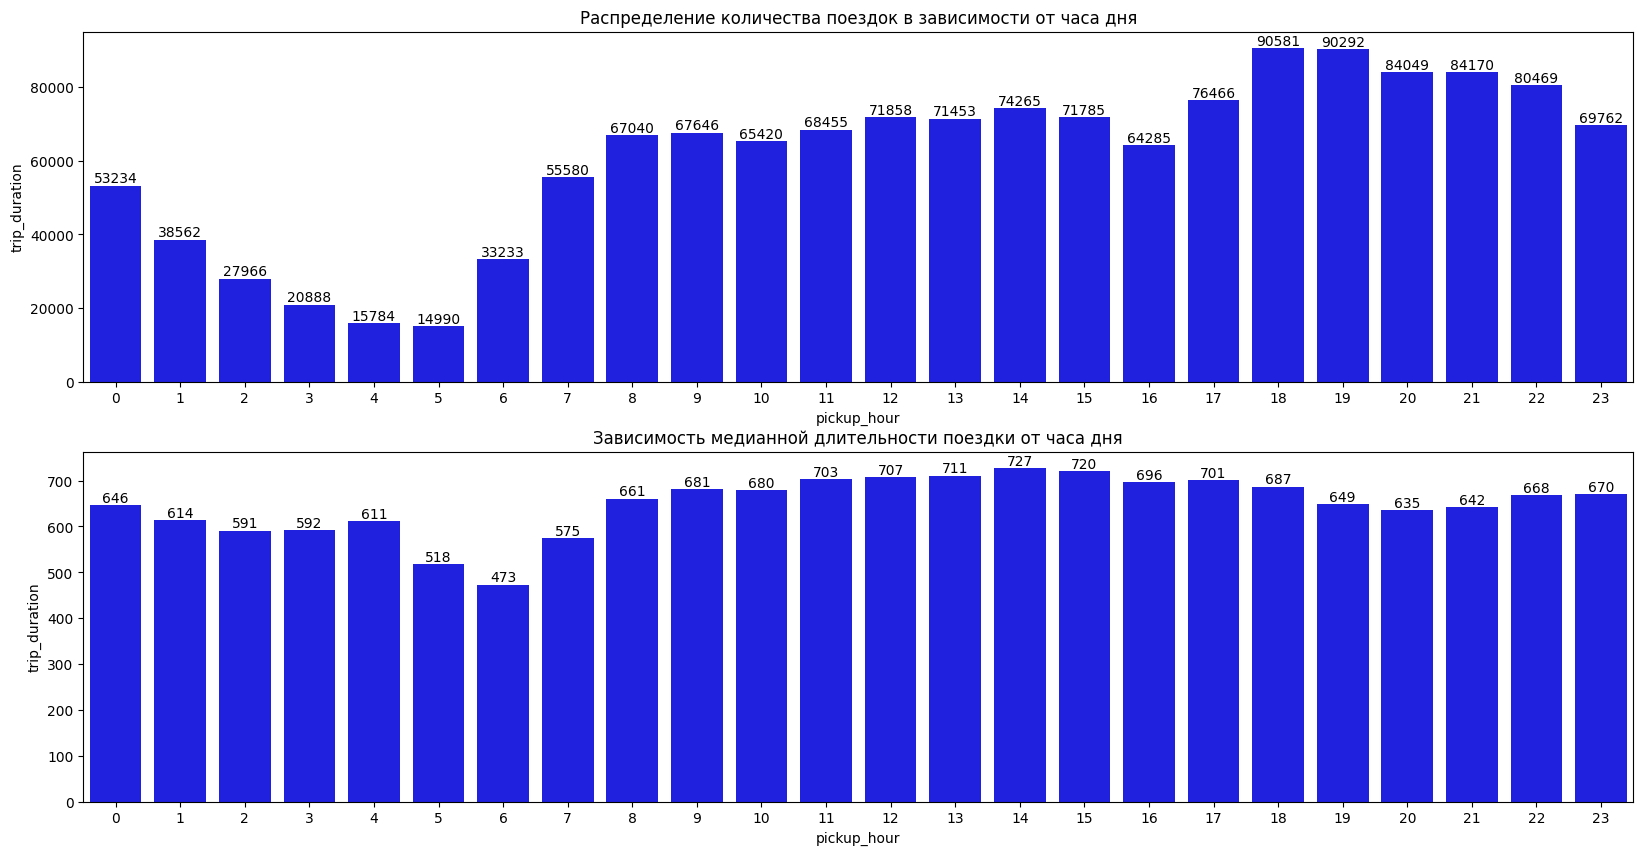

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
barplot = sns.barplot(
    data=data_a,
    x=data_a.iloc[:, 0],
    y=data_a.iloc[:, 1],
    color='blue',
    ax=axes[0]);
barplot.set_title('Распределение количества поездок в зависимости от часа дня');
barplot.bar_label(barplot.containers[0]);
barplot = sns.barplot(
    data=data_b,
    x=data_b.iloc[:, 0],
    y=data_b.iloc[:, 1],
    color='blue',
    ax=axes[1]);
barplot.set_title('Зависимость медианной длительности поездки от часа дня');
barplot.bar_label(barplot.containers[0]);

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [ ]:
data_c = taxi_data.groupby(by='pickup_day_of_week', as_index=False)['trip_duration'].count()
data_d = taxi_data.groupby(by='pickup_day_of_week', as_index=False)['trip_duration'].median()

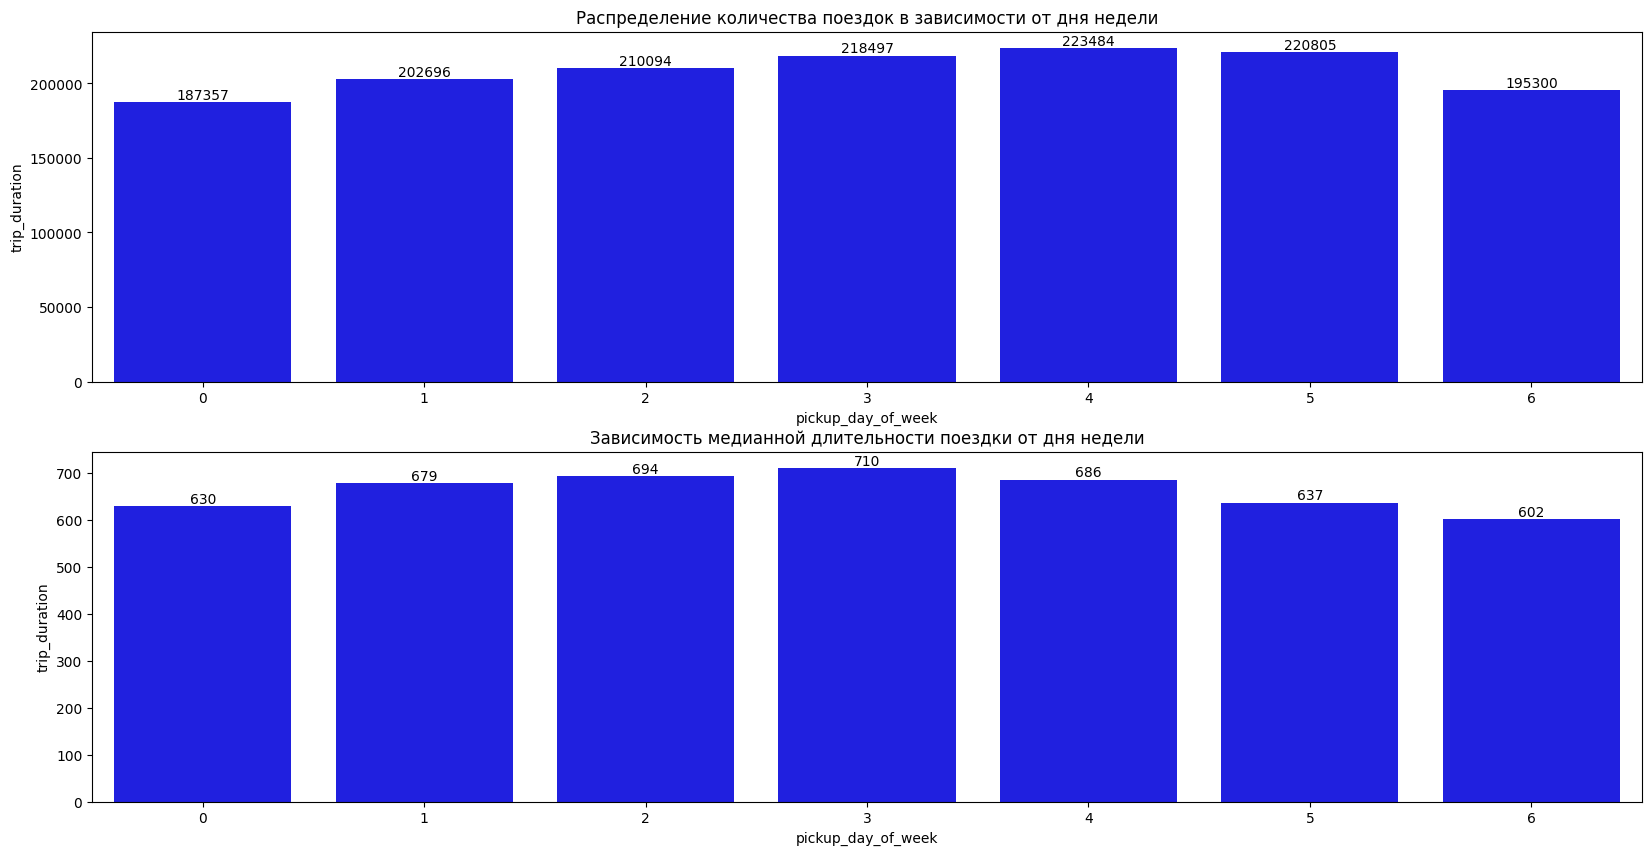

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
barplot = sns.barplot(
    data=data_c,
    x=data_c.iloc[:, 0],
    y=data_c.iloc[:, 1],
    color='blue',
    ax=axes[0]);
barplot.set_title('Распределение количества поездок в зависимости от дня недели');
barplot.bar_label(barplot.containers[0]);
barplot = sns.barplot(
    data=data_d,
    x=data_d.iloc[:, 0],
    y=data_d.iloc[:, 1],
    color='blue',
    ax=axes[1]);
barplot.set_title('Зависимость медианной длительности поездки от дня недели');
barplot.bar_label(barplot.containers[0]);

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [ ]:
pivot = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    fill_value=0,
    aggfunc='median'
)
pivot

pickup_day_of_week    0      1      2    3      4      5      6
pickup_hour                                                    
0                   598  591.0  601.0  609  649.0  685.0  675.0
1                   567  584.0  553.0  564  600.0  640.0  643.0
2                   565  565.0  544.0  576  572.0  610.0  604.5
3                   600  568.0  574.0  584  578.0  591.0  608.0
4                   640  600.5  616.0  595  634.0  610.0  598.5
5                   519  455.0  448.0  480  532.0  631.0  634.0
6                   462  461.0  463.0  471  476.0  508.0  554.0
7                   575  586.0  593.0  599  578.0  481.0  474.0
8                   672  703.0  704.0  721  689.0  489.0  460.0
9                   705  755.0  742.0  772  743.0  510.0  470.0
10                  694  778.0  788.0  772  744.0  542.0  506.0
11                  702  806.0  809.0  804  754.5  579.0  551.0
12                  692  783.5  800.5  799  746.0  618.0  594.0
13                  673  768.5  798.0  772  712.0  651.5  628.0
14                  681  768.0  783.0  811  735.0  660.0  667.0
15                  676  741.0  774.0  786  759.0  662.0  658.5
16                  642  706.0  741.0  757  729.5  655.0  672.0
17                  645  713.0  759.0  753  712.0  685.0  650.0
18                  637  699.5  724.0  729  696.0  678.0  641.0
19                  575  631.0  658.0  692  669.0  698.0  600.5
20                  573  622.0  639.0  682  664.0  669.0  585.0
21                  597  634.0  665.0  692  666.0  656.0  570.0
22                  602  659.0  675.0  709  705.0  690.0  586.0
23                  612  633.0  659.0  692  717.0  705.0  595.5

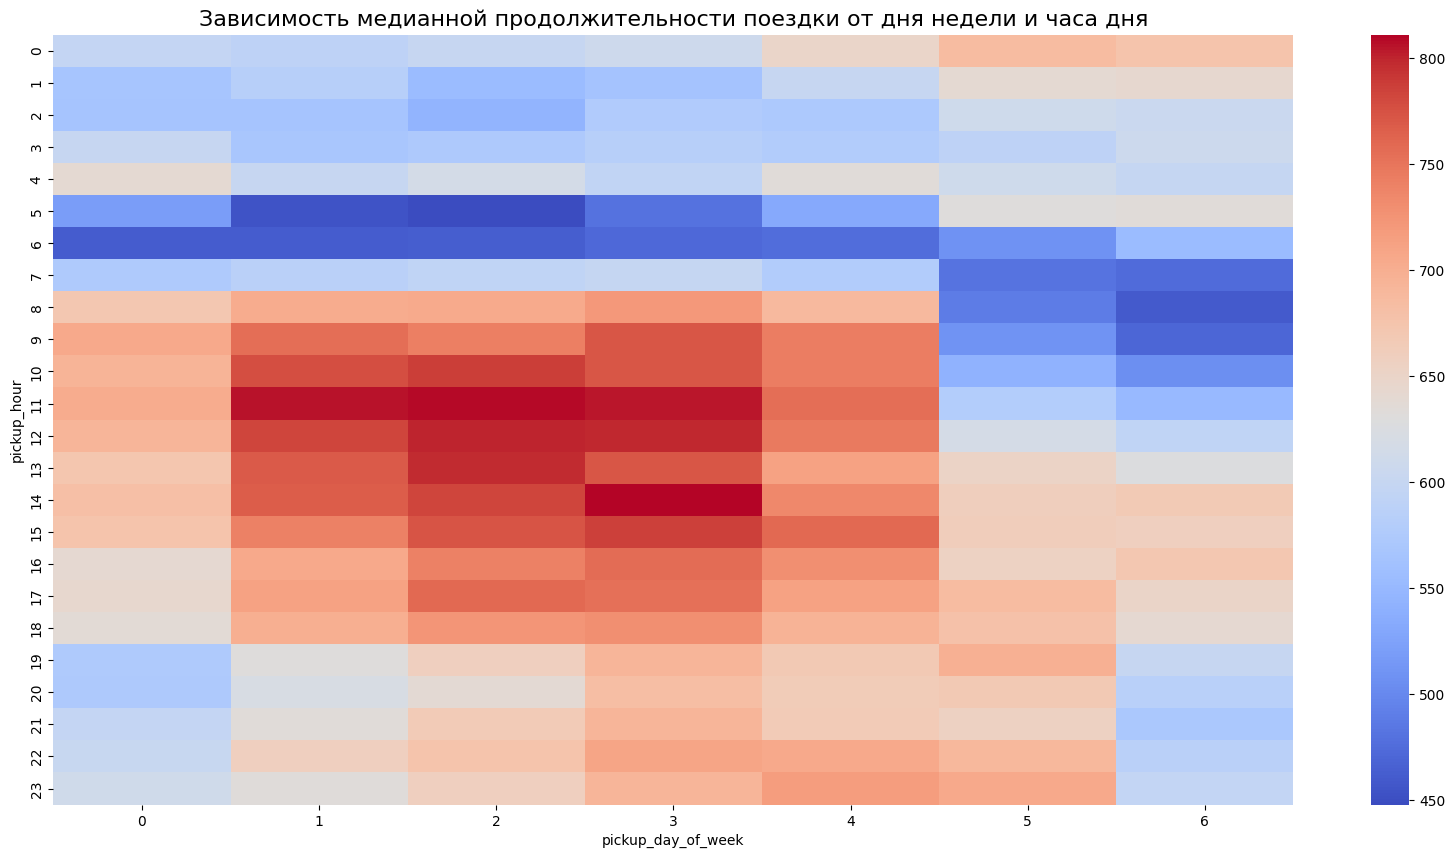

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10))
pivot_time = sns.heatmap(data=pivot, cmap="coolwarm");
pivot_time.set_title('Зависимость медианной продолжительности поездки от дня недели и часа дня', fontsize=16);

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


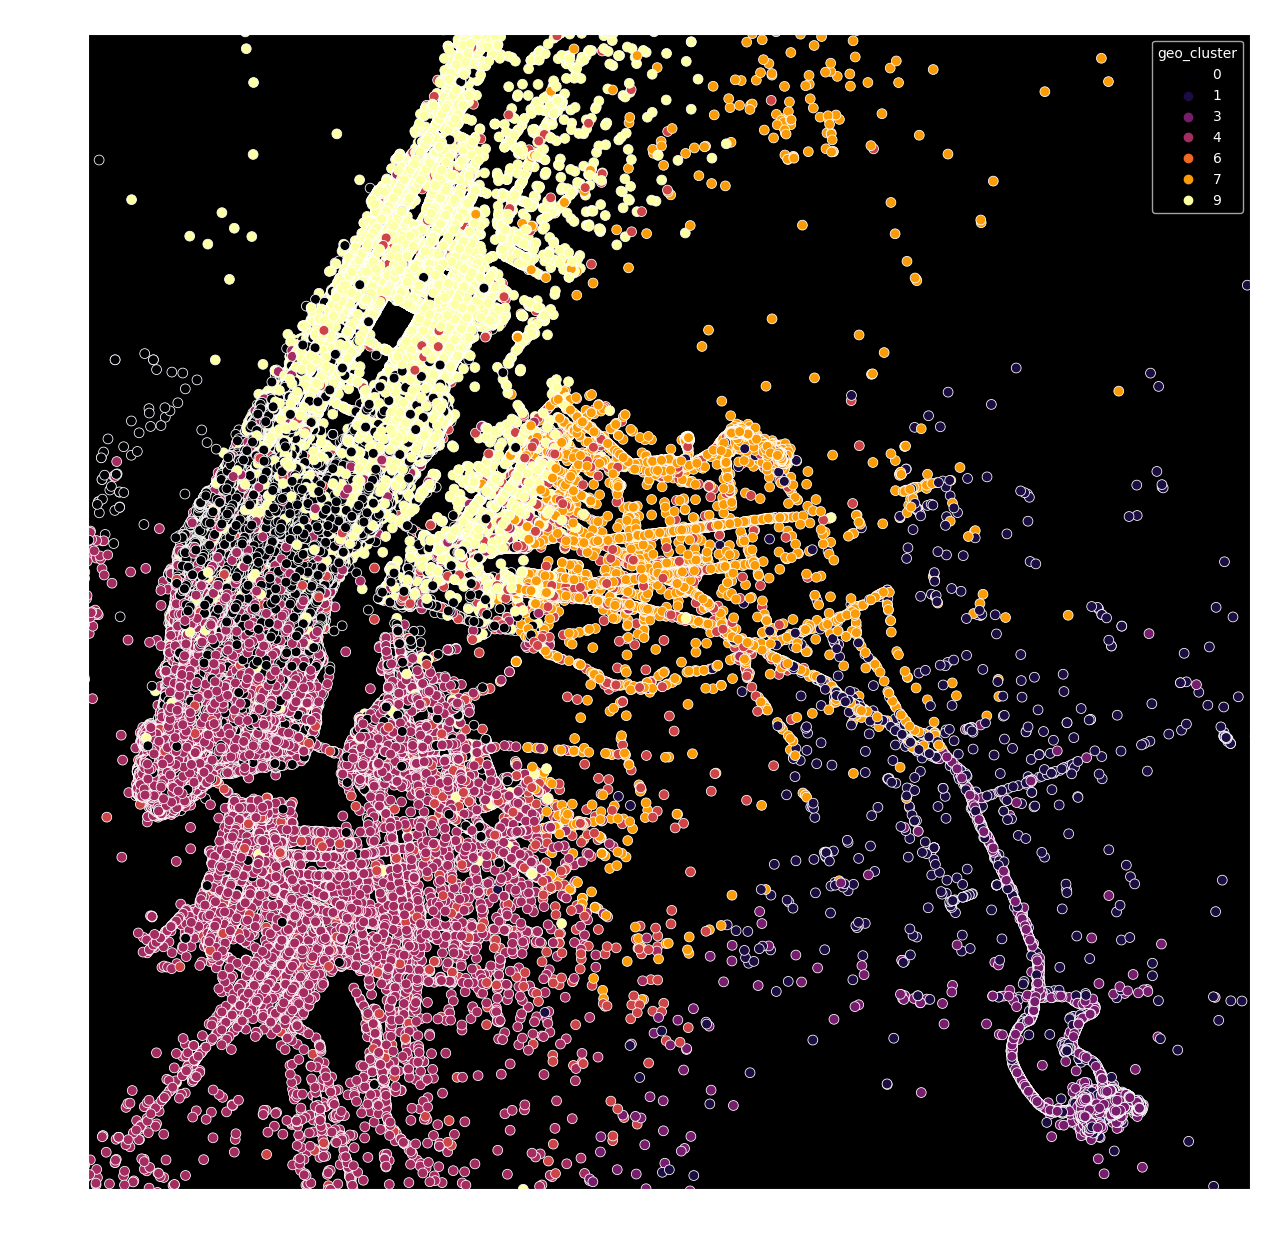

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig = plt.figure(figsize=(15, 15))
plt.style.use('dark_background')
scatterplot1 = sns.scatterplot(
    data=taxi_data,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    palette='inferno',
    s=50
);
scatterplot1.set(xlim=city_long_border, ylim=city_lat_border);
scatterplot1.set_title('Географическое расположение точек начала поездок', fontsize=16);
scatterplot1.set_xlabel('Широта');
scatterplot1.set_ylabel('Долгота');

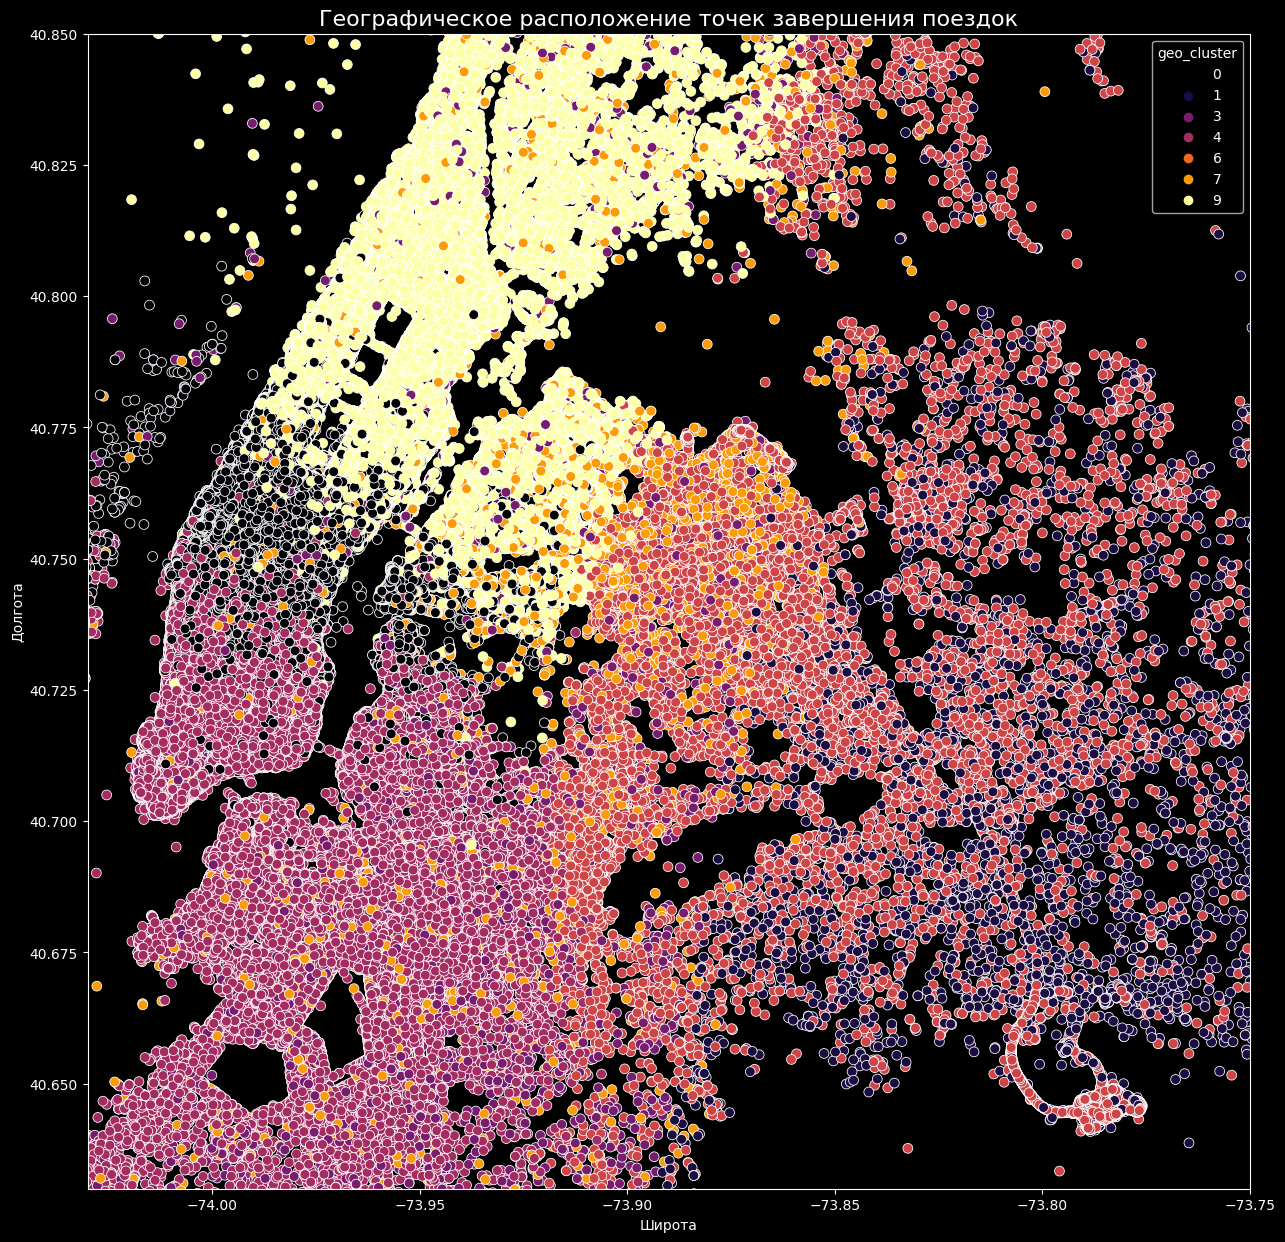

In [ ]:
fig = plt.figure(figsize=(15, 15))
plt.style.use('dark_background')
scatterplot2 = sns.scatterplot(
    data=taxi_data,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    palette='inferno',
    s=50
);
scatterplot2.set(xlim=city_long_border, ylim=city_lat_border);
scatterplot2.set_title('Географическое расположение точек завершения поездок', fontsize=16);
scatterplot2.set_xlabel('Широта');
scatterplot2.set_ylabel('Долгота');

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  number_of_steps  \
0         40.765602                  N  ...              5.0   
1         40.731152                  N  ...              6.0   
2         40.710087                  N  ...             16.0   
3         40.706718                  N  ...              4.0   
4         40.782520                  N  ...              5.0   

  haversine_distance   direction  geo_cluster  temperature  visibility  \
0           1.498521   99.970196            9          4.4         8.0   
1           1.805507 -117.153768            4         28.9        16.1   
2           6.385098 -159.680165            4         -6.7        16.1   
3           1.485498 -172.737700            4          7.2        16.1   
4           1.188588  179.473585            9          9.4        16.1   

   wind speed  precip  events  trip_duration_log  
0        27.8     0.3    None           6.122493  
1         7.4     0.0    None           6.498282  
2        24.1     0.0    None           7.661527  
3        25.9     0.0    None           6.063785  
4         9.3     0.0    None           6.077642  

[5 rows x 27 columns]

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


а) Признак id является уникальным для каждой поездки и не несёт полезной информации в определении её продолжительности

б) Утечка данных (data leak) - это основной тип утечки. Он связан с тем, что признаки обучающего набора данных, доступные на этапе построения модели, оказываются недоступными при её эксплуатации

в) Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков

In [ ]:
train_data.drop(['id','pickup_datetime', 'pickup_date', 'dropoff_datetime'],axis=1,inplace=True)
train_data.shape[1]

23

### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
train_data.vendor_id.value_counts()

2    780118
1    678115
Name: vendor_id, dtype: int64

In [ ]:
train_data['vendor_id'] = train_data['vendor_id'].map({1: 0, 2: 1})
train_data.vendor_id.value_counts()

1    780118
0    678115
Name: vendor_id, dtype: int64

In [ ]:
train_data.store_and_fwd_flag.value_counts()

N    1450192
Y       8041
Name: store_and_fwd_flag, dtype: int64

In [ ]:
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
train_data.store_and_fwd_flag.value_counts()

0    1450192
1       8041
Name: store_and_fwd_flag, dtype: int64

In [ ]:
train_data['vendor_id'] = train_data['vendor_id'].astype('int8')
train_data['vendor_id'].mean()

0.53497486341346

In [ ]:
train_data.store_and_fwd_flag.mean()

0.005514207948935458

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

one_hot_encoder = OneHotEncoder(drop='first')

data_onehot = one_hot_encoder.fit_transform(taxi_data[columns_to_change]).toarray()

column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

In [ ]:
data_onehot.head()

pickup_day_of_week_1  pickup_day_of_week_2  pickup_day_of_week_3  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   0.0   

   pickup_day_of_week_4  pickup_day_of_week_5  pickup_day_of_week_6  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   1.0                   0.0   

   geo_cluster_1  geo_cluster_2  geo_cluster_3  geo_cluster_4  geo_cluster_5  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            1.0            0.0   
2            0.0            0.0            0.0            1.0            0.0   
3            0.0            0.0            0.0            1.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   geo_cluster_6  geo_cluster_7  geo_cluster_8  geo_cluster_9  events_None  \
0            0.0            0.0            0.0            1.0          1.0   
1            0.0            0.0            0.0            0.0          1.0   
2            0.0            0.0            0.0            0.0          1.0   
3            0.0            0.0            0.0            0.0          1.0   
4            0.0            0.0            0.0            1.0          1.0   

   events_Rain  events_Snow  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0

Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


In [ ]:
train_data.to_csv('/content/train_data.csv',index=False)

In [ ]:
files.download('/content/train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
selector = SelectKBest(score_func = f_regression, k=25)
selector.fit(X_train, y_train_log)
best_features=selector.get_feature_names_out()

X_train = X_train[best_features].astype(float)
X_valid = X_valid[best_features].astype(float)

best_features

array(['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_hour', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature', 'pickup_day_of_week_Monday',
       'pickup_day_of_week_Saturday', 'pickup_day_of_week_Sunday',
       'pickup_day_of_week_Thursday', 'pickup_day_of_week_Tuesday',
       'pickup_day_of_week_Wednesday', 'geo_cluster_1', 'geo_cluster_3',
       'geo_cluster_5', 'geo_cluster_7', 'geo_cluster_9'], dtype=object)

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[best_features])
X_valid_scaled = scaler.transform(X_valid[best_features])

print('Среднее арифметическое для первого предиктора:', X_valid_scaled[:,0].mean().round(2))

Среднее арифметическое для первого предиктора: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train_log)

y_pred_train_scaled= lr.predict(X_train_scaled)
y_pred_valid_scaled = lr.predict(X_valid_scaled)

RMSLE_train = mean_squared_error(y_pred_train_scaled,y_train_log, squared=False)
RMSLE_valid = mean_squared_error(y_pred_valid_scaled,y_valid_log, squared=False)

print('RMSLE train: %.2f' % RMSLE_train)
print('RMSLE valid: %.2f' % RMSLE_valid)

RMSLE train: 0.54
RMSLE valid: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


***Не хватило мощности***


In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.fit_transform(X_valid_scaled)

lr.fit(X_train_poly,y_train_log)

y_pred_train_poly = lr.predict(X_train_poly)
y_pred_valid_poly = lr.predict(X_valid_poly)

RMSLE_train_poly = mean_squared_error(y_pred_train_poly,y_train_log, squared=False)
RMSLE_valid_poly = mean_squared_error(y_pred_valid_poly,y_valid_log, squared=False)

print('RMSLE train_poly: %.2f' % RMSLE_train_poly)
print('RMSLE valid_poly: %.2f' % RMSLE_valid_poly)

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
rm = Ridge()

rm.fit(X_train_poly,y_train_log)

y_pred_train_poly = rm.predict(X_train_poly)
y_pred_valid_poly = rm.predict(X_valid_poly)


RMSLE_train_poly = mean_squared_error(y_pred_train_poly,y_train_log, squared=False)
RMSLE_valid_poly = mean_squared_error(y_pred_valid_poly,y_valid_log, squared=False)

print('RMSLE train_poly: %.2f' % RMSLE_train_poly)
print('RMSLE valid_poly: %.2f' % RMSLE_valid_poly)

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
dtr = DecisionTreeRegressor()

# обучение дерева решений по алгоритму CART
dtr.fit(X_train_scaled, y_train_log)

# предсказание значения
y_pred_train_dtr = dtr.predict(X_train_scaled)
y_pred_valid_dtr = dtr.predict(X_valid_scaled)

# оценка предсказания
RMSLE_train_dtr = mean_squared_error(y_pred_train_dtr,y_train_log, squared=False)
RMSLE_valid_dtr = mean_squared_error(y_pred_valid_dtr,y_valid_log, squared=False)

print('RMSLE train_dtc: %.2f' % RMSLE_train_dtr)
print('RMSLE valid_dtc: %.2f' % RMSLE_valid_dtr)

RMSLE train_dtc: 0.00
RMSLE valid_dtc: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
param_grid = {'max_depth': np.arange(3, 15)}

gst = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)

gst.fit(X_train_scaled, y_train_log)

y_pred_train_gst = gst.predict(X_train_scaled)
y_pred_valid_gst = gst.predict(X_valid_scaled)

gst.score(X_valid_scaled,y_valid_log)

RMSLE_train_gst = mean_squared_error(y_pred_train_gst,y_train_log, squared=False)
RMSLE_valid_gst = mean_squared_error(y_pred_valid_gst,y_valid_log, squared=False)

print("Наилучшие значения гиперпараметров: {}".format(gst.best_params_))
print('RMSLE train_gst: %.2f' % RMSLE_train_gst)
print('RMSLE valid_gst: %.2f' % RMSLE_valid_gst)

Наилучшие значения гиперпараметров: {'max_depth': 11}
RMSLE train_gst: 0.41
RMSLE valid_gst: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
rfr = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)

#Обучаем модель
rfr.fit(X_train_scaled, y_train_log)

y_pred_train_rfr = rfr.predict(X_train_scaled)
y_pred_valid_rfr = rfr.predict(X_valid_scaled)

rfr.score(X_valid_scaled,y_valid_log)

RMSLE_train_rfr = mean_squared_error(y_pred_train_rfr,y_train_log, squared=False)
RMSLE_valid_rfr = mean_squared_error(y_pred_valid_rfr,y_valid_log, squared=False)

print('RMSLE train_rfr: %.2f' % RMSLE_train_rfr)
print('RMSLE valid_rfr: %.2f' % RMSLE_valid_rfr)

RMSLE train_rfr: 0.40
RMSLE valid_rfr: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
gbr = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

#Обучаем модель
gbr.fit(X_train_scaled, y_train_log)

y_pred_train_gbr = gbr.predict(X_train_scaled)
y_pred_valid_gbr = gbr.predict(X_valid_scaled)

gbr.score(X_valid_scaled,y_valid_log)

RMSLE_train_gbr = mean_squared_error(y_pred_train_gbr,y_train_log, squared=False)
RMSLE_valid_gbr = mean_squared_error(y_pred_valid_gbr,y_valid_log, squared=False)

print('RMSLE train_rfr: %.2f' % RMSLE_train_gbr)
print('RMSLE valid_rfr: %.2f' % RMSLE_valid_gbr)

RMSLE train_rfr: 0.37
RMSLE valid_rfr: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* **Градиентный бустинг над деревьями решений**


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


<Axes: >

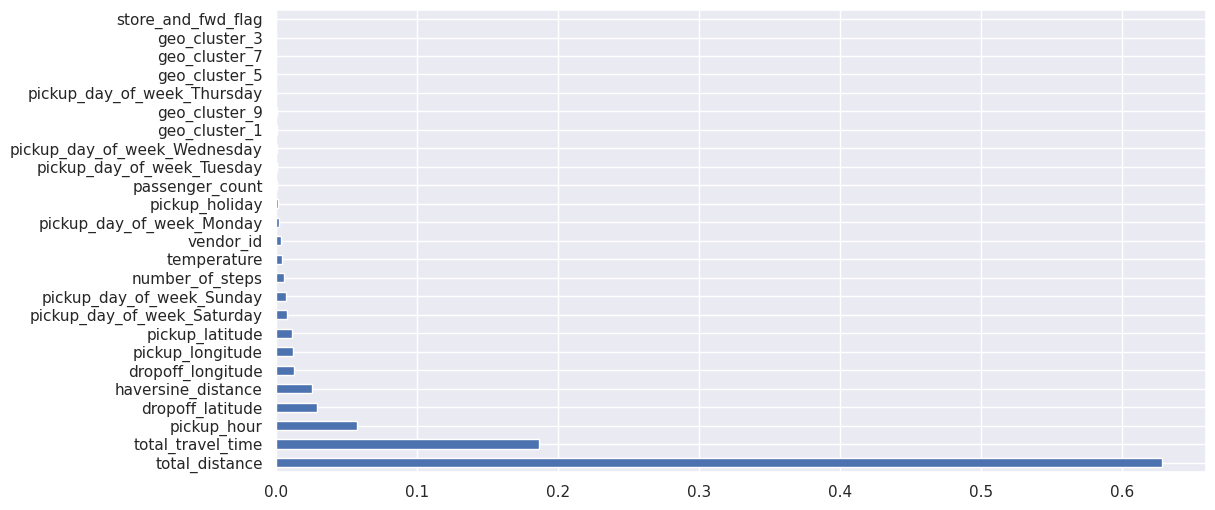

In [ ]:
fig = plt.figure(figsize=(12, 6))
feat_importances = pd.Series(gbr.feature_importances_, index=best_features)
feat_importances.nlargest(25).plot(kind='barh')

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
y_valid = np.exp(y_valid_log)-1
y_pred_valid = np.exp(gbr.predict(X_valid_scaled))-1

MeAE = median_absolute_error(y_pred_valid,y_valid)


print('MeAE для GBR: ', round(MeAE/60, 1))

MeAE для GBR:  1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_data.csv")
osrm_data_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

<ipython-input-9-9003f5aed1d8>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
y_test_predict = np.exp(gbr.predict(X_test_scaled))-1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/content/drive/MyDrive/data/submission.csv', index=False)